In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
iris = pd.read_csv('/content/iris (3).csv')

# Split features and labels
X = iris.drop('species', axis=1)
y = iris['species']

# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate models
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Linear Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

print("\nRBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF Kernel Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


Linear Kernel Accuracy: 1.0
Linear Kernel Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

RBF Kernel Accuracy: 1.0
RBF Kernel Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy Score: 0.8545
Confusion Matrix:
 [[140   1   0   0   0   0   2   0   0   2   0   0   0   0   0   0   0   1
    1   0   0   1   0   0   1   0]
 [  1 133   0   3   0   0   0   5   0   0   1   0   0   1   0   1   0   6
    1   0   0   1   0   0   0   0]
 [  0   0 117   0   1   0   4   2   0   0   6   1   0   0   3   0   0   0
    1   0   2   0   0   0   0   0]
 [  0   6   0 141   0   0   0   2   0   1   2   0   0   1   1   0   0   0
    0   2   0   0   0   0   0   0]
 [  0   1   2   0 127   0   4   0   0   0   1   1   0   0   0   0   1   1
    2   1   0   0   0   0   0   0]
 [  0   0   0   0   3 127   0   1   2   1   0   0   0   0   0   1   0   0
    2   3   0   0   0   0   0   0]
 [  0   1   8   2   0   0 129   2   0   1   3   0   0   0   0   0   7   1
    2   0   0   2   2   0   0   0]
 [  1   4   1  10   1   2   0  85   0   3   6   0   0   2  10   1   2  12
    0   0   2   0   0   1   1   0]
 [  0   0   0   3   0   2   0   0 127   6   0   2   0   0   0   0   1   0
    1   0   

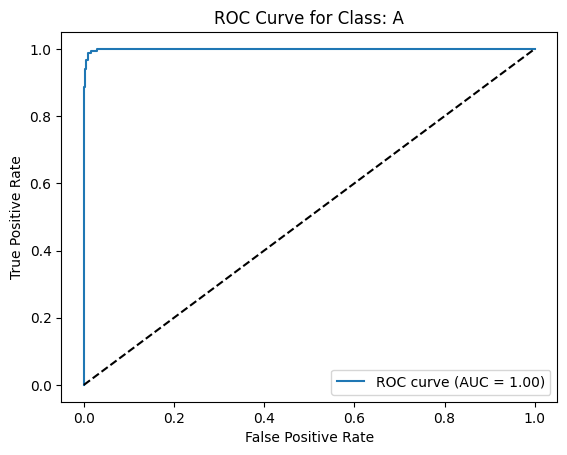

In [3]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Load the letter-recognition dataset
letters = pd.read_csv('/content/letter-recognition.csv')

# Separate features and label
X = letters.iloc[:, 1:]
y = letters.iloc[:, 0]

# Encode the labels for ROC/AUC calculation (one-vs-rest)
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Split data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)
_, _, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_model.predict(X_test)
y_score = svm_model.predict_proba(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for the first class (just an example)
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (AUC = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class: ' + lb.classes_[0])
plt.legend(loc="lower right")
plt.show()
